In [ ]:
#Desription: Machine Learning for simple trading/investing

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import yfinance as yf

In [4]:
# Load stock data
df = yf.download('AAPL', start='2012-01-01', end='2024-09-29')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402628,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469277,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607712,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739511,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719305,394024400
...,...,...,...,...,...,...
2024-08-22,227.789993,228.339996,223.899994,224.529999,224.529999,43695300
2024-08-23,225.660004,228.220001,224.330002,226.839996,226.839996,38677300
2024-08-26,226.759995,227.279999,223.889999,227.179993,227.179993,30602200


In [8]:
# x variables
df['High-Low'] = df['High'] - df['Low']
df['Open-Close'] = df['Open'] - df['Close']

In [10]:
# store x variables in a variable called 'x'
X = df[['High-Low', 'Open-Close', 'Close']]
X.head()

,High-Low,Open-Close,Close
Date,,,
2012-01-03,0.125000,-0.065356,14.686786
2012-01-04,0.192858,-0.122857,14.765714
2012-01-05,0.210000,-0.110000,14.929643
2012-01-06,0.126071,-0.093928,15.085714
2012-01-09,0.228572,0.134644,15.061786


In [12]:
# y variable. if tomorrow's close price > today's put 1, else put 0
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
Y

array([1, 1, 1, ..., 1, 0, 0])

In [13]:
# split data into training and testing
split = int(0.8 * len(df))

X_train = X[:split]
X_test = X[split:]

Y_train = Y[:split]
Y_test = Y[split:]

In [17]:
# import machine learning model (SVC - Support Vector Classifier)
from sklearn.svm import SVC
svc_model = SVC().fit(X_train[['Open-Close', 'High-Low']], Y_train)

In [18]:
# model score on train data
svc_model.score(X_train[['Open-Close', 'High-Low']], Y_train)

0.5339615233608166

In [19]:
# model score on test data
svc_model.score(X_test[['Open-Close', 'High-Low']], Y_test)

0.5149136577708007

In [21]:
# model predictions
df['Prediction'] = svc_model.predict(X[['Open-Close', 'High-Low']])
df['Prediction']

,Prediction
Date,
2012-01-03,1
2012-01-04,1
2012-01-05,1
2012-01-06,1
2012-01-09,1
...,...
2024-08-22,1
2024-08-23,1
2024-08-26,1


In [25]:
# daily returns
df['Returns'] = df['Close'].pct_change(1)
df['Returns']

,Returns
Date,
2012-01-03,NaN
2012-01-04,0.005374
2012-01-05,0.011102
2012-01-06,0.010454
2012-01-09,-0.001586
...,...
2024-08-22,-0.008260
2024-08-23,0.010288
2024-08-26,0.001499


In [24]:
# strategy returns
df['Strategy'] = df['Returns'] * df['Prediction'].shift(1)
df['Strategy']

,Strategy
Date,
2012-01-03,NaN
2012-01-04,0.005374
2012-01-05,0.011102
2012-01-06,0.010454
2012-01-09,-0.001586
...,...
2024-08-22,-0.008260
2024-08-23,0.010288
2024-08-26,0.001499


In [26]:
# cumulative returns
df['Cumulative Strategy Returns'] = df['Strategy'].cumsum()

df['Cumulative Holding Returns'] = df['Returns'].cumsum()

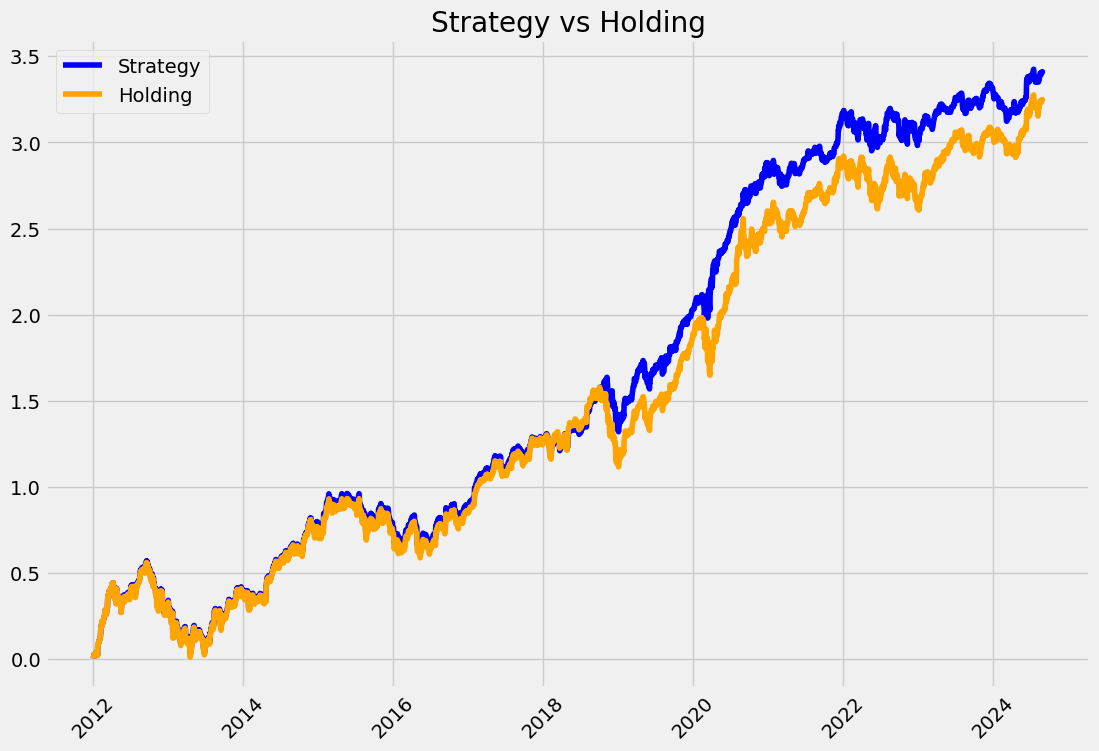

In [27]:
# plot
plt.figure(figsize=(12, 8))
plt.title('Strategy vs Holding')
plt.plot(df['Cumulative Strategy Returns'], color = 'blue', label='Strategy')
plt.plot(df['Cumulative Holding Returns'], color = 'orange', label='Holding')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [29]:
# returns total
print('Total Strategy Returns:', df["Cumulative Strategy Returns"][-1]*100,'%')
print('Total Holding Returns:', df["Cumulative Holding Returns"][-1]*100,'%')

Total Strategy Returns: 340.4594194910924 %
Total Holding Returns: 324.2797504245878 %
